<!--NAVIGATION-->
< | [Main Contents](https://vectorbite.github.io/VBiTraining2/) | >

# Repeatable Analysis, Packages, and Function Design <span class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Repeatable-Analysis" data-toc-modified-id="Repeatable-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Repeatable Analysis</a></span><ul class="toc-item"><li><span><a href="#No-one-else-will-do-my-analysis,-why-would-I-need-it-to-be-scripted?" data-toc-modified-id="No-one-else-will-do-my-analysis,-why-would-I-need-it-to-be-scripted?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>No-one else will do my analysis, why would I need it to be scripted?</a></span></li><li><span><a href="#Switching-to-a-repeatable-process-is-easy!" data-toc-modified-id="Switching-to-a-repeatable-process-is-easy!-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Switching to a repeatable process is easy!</a></span></li><li><span><a href="#A-change-in-thinking" data-toc-modified-id="A-change-in-thinking-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>A change in thinking</a></span></li><li><span><a href="#An-example-of-a-repeatable-script" data-toc-modified-id="An-example-of-a-repeatable-script-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>An example of a repeatable script</a></span></li><li><span><a href="#First-Task" data-toc-modified-id="First-Task-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>First Task</a></span></li></ul></li><li><span><a href="#Packages" data-toc-modified-id="Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#The-multifunction-breadmaker" data-toc-modified-id="The-multifunction-breadmaker-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The multifunction breadmaker</a></span></li><li><span><a href="#The-structure-of-an-R-package" data-toc-modified-id="The-structure-of-an-R-package-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The structure of an R package</a></span></li></ul></li></ul></div>

## Repeatable Analysis

If we want someone to do a task in the same manner that we have, we can write them a list:

1. Measure ingredients
2. Mix ingredients
3. Knead dough
4. Leave to rise
5. Form dough into a loaf
6. Prove dough
7. Bake dough

Now this is all well and good, but we leave a lot of room for human error. How long do they mix for? How do they know when the bread is risen? All of these steps have places for deviation from the process we went through to make our loaf.

Wouldn't it be easier if we could give the other person a way to perform the same task again and again in exactly the same way? In this case, let's give our other person a breadmaker with one button - **Make Good Bread**. Now the instrictions are as follows:

1. Measure ingredients
2. Empty into breadmaker
3. Press **Make Good Bread** button

This process is *repeatable* and means that as long as the right ingredients are used in the right quantities, the result should be the same each time.

We can apply the same thinking to our data handling and analysis steps as we work. Rather than telling others "I did x, then I did y" we can instead say "Run the file `analysis_and_plot.R`". As long as they have the same data, they will get the same graphs!

### No-one else will do my analysis, why would I need it to be scripted?

There are some benefits to scripting your analysis even if you're only doing it for yourself. With a scripted workflow, we gain some major advantages for ourselves over running our R code line-by-line:

- We know the loaded data will be in the right place, and will be clean from any changes we make later in the script
- We won't accidentally run the same transformation twice on the same vector
- We can design our analysis PRIOR to actually collecting our data

I've seen many days wasted by people running R code interactively (though there is naturally a place for that). I personally believe that the last point above is the most important. If we know the form and structure of the data we WILL get once we return from field research, we can have a pipeline already in place so the analysis can be performed immediately!

### Switching to a repeatable process is easy!

Take a look at the following R code (here we will be using the inbuilt `iris` dataset distributed with R): **(FW: replace iris with actual VT data)**

In [8]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [12]:
# Divide the sum of petal widths by the number of data entries to get the mean petal width
petal_width_mean <- sum(iris$Petal.Width) / 150
petal_width_mean

[1] 1.199333

This obviously works fine for the iris dataset, which we can confirm by running the inbuilt mean function:

In [13]:
mean(iris$Petal.Width)

[1] 1.199333

Now notice in our analogy at the top that there is still one place for things to go wrong: the ingredients. You cannot control what others try to put through your code. They may try to put a lobster in your breadmaker...or maybe cement. Either way they will not get the result they expected when the program is complete.

So what happens if we try to run this on a different dataset, or in this case a subset?

In [32]:
# Sample 50 elements of the iris dataset randomly
iris_new <- iris[sample(1:150, 50, replace = FALSE),]

# Calculate mean as before
new_petal_width_mean <- sum(iris_new$Petal.Width) / 150
new_petal_width_mean

[1] 0.382

That doesn't look right! The mean of a randomly chosen subset should be similar to the mean of the original data. 

Let's check to see whether it's our calculation that's out:

In [33]:
mean(iris_new$Petal.Width)

[1] 1.146

Yeah that looks a lot more reasonable. But what went wrong?

Can you see where the error may have arisen?

### A change in thinking

As I'm sure you spotted, our error was in using what is colloquially termed a *magic number*: **150**. We didn't consider for a second that the data running through our "analysis" was anything other than the data we were initially working with. As the mean is calculated by dividing the sum of the samples by the number of samples, and our original number of samples was 150, this didn't change when we changed the dataset.

Let's fix this in a manner where it should never break again:

In [34]:
new_petal_width_mean <- sum(iris_new$Petal.Width) / nrow(iris_new)
new_petal_width_mean

[1] 1.146

There we go! Much better.

So now it works well for all datasets (technically this would break on a dataset with 0 rows in it, but let's ignore that for now). However each time we want to use our own homebrew mean function, we have to write it out and change the code again and again. This is a lot of effort and introduces the potential for fat-fingered typos. So let's change this into a function we can call again and again.

In [40]:
homebrew_pw_mean <- function(df){
    return(sum(df$Petal.Width) / nrow(df))
}
homebrew_pw_mean(iris)
homebrew_pw_mean(iris_new)

[1] 1.199333

[1] 1.146

This concept is called *genericisation*. Whilst not essential for repeatable analysis, generic functions are often good practice, make it easier to write similar code down the line, and are a vital part of packages (which we will address later)

### An example of a repeatable script

Here I am going to provide you with a commented template for a repeatable analysis script. It won't actually do anything that we care about, but it gives you an idea of how to structure a script such that it should just be able to be run again and again.

Record.number,In.refID,IndividualID,Predator,Predator.common.name,Predator.taxon,Predator.lifestage,Type.of.feeding.interaction,Predator.mass,Prey,Prey.common.name,Prey.taxon,Prey.mass,Prey.mass.unit,Location
1,ATSH063,1,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,1540.0,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,14.30,g,"Apalachicola Bay, Florida"
2,ATSH080,2,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,1600.0,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,6.02,g,"Apalachicola Bay, Florida"
3,ATSH089,3,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,1840.0,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,11.90,g,"Apalachicola Bay, Florida"
4,ATSH143,4,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,87.6,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,8.12,g,"Apalachicola Bay, Florida"
5,ATSH161,5,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,63.9,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,6.56,g,"Apalachicola Bay, Florida"
6,ATSH166,6,Rhizoprionodon terraenovae,Atlantic sharpnose shark,ectotherm vertebrate,adult,predacious/piscivorous,79.2,teleosts/molluscs/crustaceans,teleosts/molluscs/crustaceans,mixed,5.41,g,"Apalachicola Bay, Florida"


Predator,mean_mass
Acanthocepola sp.,0.00912200
Ammodytes hexapterus,0.09127324
Anarhichas lupus,0.14158468
Anarhichas minor,0.22757436
Arnoglossus imperialis,19.30000000
Aspitrigla cuculus,178.86250000


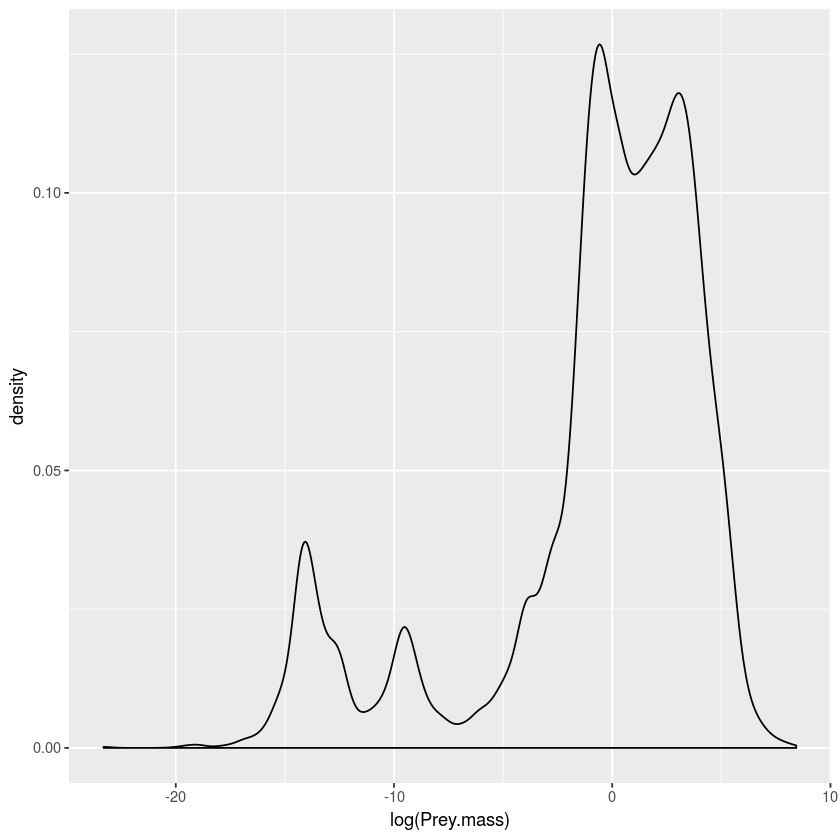

In [6]:
# Clean the workspace to make sure nothing gets in the way
rm(list=ls())

# Load required packages using library or require
library(ggplot2)
library(dplyr)

# Define functions we will use later
generate_pred_mean_masses <- function(df){
    pred_mean_mass <- df %>% group_by(Predator) %>% summarise(mean_mass = mean(Predator.mass))
}

# Load the data we are using, making sure to use RELATIVE PATHS
df <- read.csv("../data/EcolArchives-E089-51-D1.csv")

# Note, I am only printing the top few entries in the datasets to show what is going on.
# In general you only want to be printing in an analysis script when you have something useful to show (i.e. output statistics)
# Don't just print for sanity checking in the final script as it can slow down a script significantly
head(df)  

# Perform data wrangling, generate useful measures, perform analysis etc.
pred_mean_mass <- generate_pred_mean_masses(df)
head(pred_mean_mass)

# Do some sort of plotting
p <- ggplot(data = df, aes(x = Predator.mass, y = Prey.mass)) + geom_point() + geom_smooth()
# print(p)

# Save outputs if needed.
# pdf("testplot.pdf")
print(ggplot(data = df, aes(x = log(Prey.mass))) + geom_density())
# dev.off()

### First Task

Your first task, should you choose to accept it is to create your own repeatable analysis for some of the VecDyn/VecTraits data.

This script should run from start to finish, only printing out results and graphs.

This should be a relatively simple task for anyone fluent in R, but nonetheless it is good practice.

Now of course, we could make this more generic, by making the script take the file to read as an argument from the command line. For now though we're going to leave repeatability alone and move on to the main focus for today: **Packages**.

---
## Packages

Packages are something written by a better programmer to solve our problems so we don't have to, right?

Well, kind of...
But why can't **WE** be that "better programmer"?

What makes them so special?

The answer is nothing. Package designers are simply normal people who had a problem, solved it, and realised that they could help others do the same thing. What we're aiming to do today is to demystify packages and show that you can help countless people with not too much effort thanks to careful programming and a bit of foresight.

<sub>Disclaimer: Some things about packages are a bit fiddly. I will not be held responsible for any loss of sanity or forehead damage to keyboards caused by looking at packages. Only use packages under parental supervision. Not suitable for ages 6 and above.</sub>

### The multifunction breadmaker

To extend the analogy I made at the start, packages are like a breadmaker with multiple functions. It helps you perform a certain task, but with plenty of flexibility within that task.

### The structure of an R package

An R package in its most basic form follows this structure:

```
. package_directory
├── DESCRIPTION
├── man
│   └── stuff.Rd
├── NAMESPACE
└── R
    └── stuff.R
```

The `DESCRIPTION` file contains the *important metadata about your package*. This includes the following information (though this is not by any means an exhaustive list):

- Name
- Title
- Version
- Description
- Authors & Contributors
- License
- Dependencies (we will talk more about this one in a bit)

The `NAMESPACE` file controls *how the functions you have created are available* to someone loading the package. Whilst this can be done by hand, it is often better to use a package like `roxygen2` to generate these for us. **(FW: Give example)**

Finally the `R` directory contains the *main R code* of the package. This is where the real hard graft comes in when creating a package. We will be predominantly focusing on this section of the package today, looking at the elements and stylistic choices you should consider when writing functions for others to use.